Its just combination of multiple decision trees.

You divide the data into various chunks and make the decision tree on that and you take the majority vote of that

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns


In [2]:
from sklearn.datasets import load_digits
dg = load_digits()

dir(dg)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

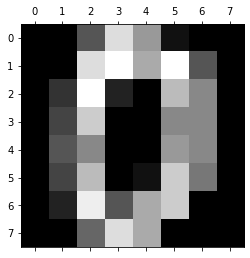

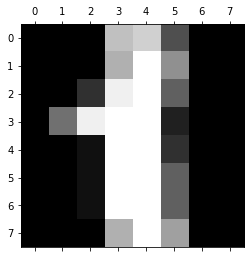

In [4]:
plt.gray()

for i in range(2):
    plt.matshow(dg.images[i])

In [4]:
df = pd.DataFrame(dg.data)
df['target'] = dg.target

df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [5]:
X = df.drop('target',axis=1)
y = df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9555555555555556

In [8]:
for i in range(1,100,20):
    model = RandomForestClassifier(n_estimators = i) 
    model.fit(X_train,y_train)
    print(i," ",model.score(X_test,y_test))


1   0.7833333333333333
21   0.9416666666666667
41   0.9583333333333334
61   0.9638888888888889
81   0.9583333333333334


In [9]:
y_predict = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[31,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  2,  2,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  3,  0,  1],
       [ 0,  0,  0,  0,  1, 42,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 33,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 27]], dtype=int64)

Text(69.0, 0.5, 'truth')

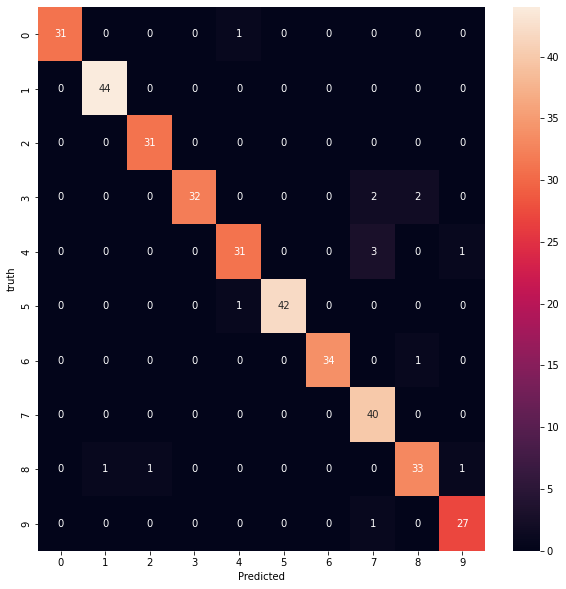

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("truth")

## Random forest by setting proper hyperparametrs


In [17]:
df = pd.read_csv("../Datasets/Heart.csv")
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [18]:
df = pd.DataFrame(df)
df = df[['Age','Sex','RestBP','Chol','AHD']]
df.head()

,Age,Sex,RestBP,Chol,AHD
0,63,1,145,233,No
1,67,1,160,286,Yes
2,67,1,120,229,Yes
3,37,1,130,250,No
4,41,0,130,204,No


In [19]:
df['AHD'].replace(['No','Yes'],[0,1],inplace=True)
df.head()

,Age,Sex,RestBP,Chol,AHD
0,63,1,145,233,0
1,67,1,160,286,1
2,67,1,120,229,1
3,37,1,130,250,0
4,41,0,130,204,0


In [20]:
X = df.drop("AHD",axis=1)
y = df['AHD']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [26]:
model_rf = RandomForestClassifier(random_state = 2,n_jobs=-1,oob_score=True)

model_rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=2)

In [27]:
model_rf.oob_score_

0.5826446280991735

In [28]:
## since the score on oob segment is low
## lets use gridsearch cv

rf = RandomForestClassifier(random_state=42, n_jobs=-1)


In [25]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [29]:
grid_search.best_score_

0.6650273224043716

In [30]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=2, min_samples_leaf=20, n_estimators=50,
                       n_jobs=-1, random_state=42)

## using Voting Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_reg = LogisticRegression()
rf = RandomForestClassifier(max_depth=2, min_samples_leaf=20, n_estimators=50,
                       n_jobs=-1, random_state=42)
svm = SVC(probability = True)


estimators = []
estimators.append(('lf',log_reg))
estimators.append(('rf',rf))
estimators.append(('svm',svm))

voting_clf =  VotingClassifier(estimators=estimators, voting ='soft')

voting_clf.fit(X_train,y_train)


## since using voting='soft' : have set the probability = true in SVC
## is using the hard parameter: then no need to set the prob  = True


VotingClassifier(estimators=[('lf', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=2,
                                                     min_samples_leaf=20,
                                                     n_estimators=50, n_jobs=-1,
                                                     random_state=42)),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [42]:
## so now we have 4 models, log,svm,voting_clf and rf

from sklearn.metrics import accuracy_score

for model in (log_reg,rf,svm,voting_clf):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model,accuracy_score(y_pred,y_test))

LogisticRegression() 0.6557377049180327
RandomForestClassifier(max_depth=2, min_samples_leaf=20, n_estimators=50,
                       n_jobs=-1, random_state=42) 0.639344262295082
SVC(probability=True) 0.639344262295082
VotingClassifier(estimators=[('lf', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=2,
                                                     min_samples_leaf=20,
                                                     n_estimators=50, n_jobs=-1,
                                                     random_state=42)),
                             ('svm', SVC(probability=True))],
                 voting='soft') 0.6721311475409836


## lets use the bagging classifier

In [48]:
from sklearn.ensemble import BaggingClassifier

## if bootstrap = False:  its pasting : that is sampling without replacement
## if true : its bagging

rf = RandomForestClassifier(max_depth=2, min_samples_leaf=20, n_estimators=50,
                       n_jobs=-1, random_state=42)
                       
bag_clf = BaggingClassifier(rf,n_estimators = 500, max_samples = 150, bootstrap = True, n_jobs =-1)

bag_clf.fit(X_train,y_train)

y_pred = bag_clf.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.7540983606557377


In [50]:
## lets see the cross validation things work

## this is bagging

from sklearn.model_selection import cross_val_score

bag_clf = BaggingClassifier(rf,n_estimators = 500, max_samples = 150, bootstrap = True, n_jobs =-1)
scores = cross_val_score(bag_clf,X,y,cv = 5)
np.mean(scores)


0.6499453551912568

In [51]:
## this is pasting

bag_clf = BaggingClassifier(rf,n_estimators = 500, max_samples = 150, bootstrap = False, n_jobs =-1)
scores = cross_val_score(bag_clf,X,y,cv = 5)
np.mean(scores)

0.6367759562841531

## OOB Score

In [52]:
bag_clf = BaggingClassifier(rf,n_estimators = 500, max_samples = 150, bootstrap = True, n_jobs =-1, oob_score=True)

bag_clf.fit(X_train,y_train)
bag_clf.oob_score

True

In [53]:
print(bag_clf.oob_score_)

0.6198347107438017


In [54]:
y_pred_oob = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred_oob)

0.7540983606557377

## Extra Trees Classiifier

In [59]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(max_depth=2, min_samples_leaf=20, n_estimators=50,
                       n_jobs=-1, random_state=42)

etc.fit(X_train,y_train)
y_pred = etc.predict(X_test)

accuracy_score(y_pred,y_test)

## too fast and almost same accuracy that of rf

0.6229508196721312

## Adaboost

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
df = DecisionTreeClassifier()

adaboost_samme = AdaBoostClassifier(base_estimator = df, n_estimators =300,learning_rate=0.08,algorithm = 'SAMME')

adaboost_samme_r = AdaBoostClassifier(base_estimator = df, n_estimators =300,learning_rate=0.08,algorithm = 'SAMME.R')

In [15]:
adaboost_samme.fit(X_train,y_train)
adaboost_samme_r.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.08,
                   n_estimators=300)

In [17]:
y_pred = adaboost_samme.predict(X_test)
y_pred_r = adaboost_samme_r.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))
print(accuracy_score(y_pred_r,y_test))


0.8333333333333334
0.825


## Gradient Boosted Regression Trees (GBRT)
also called as Gradient Tree Boosting


in this we first train the model, then find the error in the actuala nd predicted values by the model 1


Then train the model 2 on the error values that is new y_train and X_train

again find the error in the values and again train the model 3 and so on

in the end:  the predicted value should be the sum of all the predicted values of the model

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(learning_rate=0.08,n_estimators = 300,)
gbrt.fit(X_train,y_train)



GradientBoostingRegressor(learning_rate=0.08, n_estimators=300)

In [19]:
y_pred_gbrt = gbrt.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8333333333333334


## Stochiastic Gradient Boosting

in the graident boosting: subsample parametr is placed

by this say subsample==0.25, then the model is trained on each tree for just the 25% of the input data set

the data is selected without replacment

In [26]:
gbrt.max_depth

3

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(learning_rate=0.8,n_estimators = 300,subsample =0.20)
gbrt.fit(X_train,y_train)

y_pred_gbrt = gbrt.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8333333333333334


In [30]:
import xgboost

xgb = xgboost.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print(accuracy_score(y_test, y_pred))

c:\Users\Shankii\anaconda3\envs\gputest\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:28:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9583333333333334
